# Goal
This post aims to follow the tutorial [NEURAL TRANSFER USING PYTORCH](https://pytorch.org/tutorials/advanced/neural_style_tutorial.html) step-by-step. Part 1 is about image loading. The following images for content and style are loaded as PyTorch tensor. 


![image](https://user-images.githubusercontent.com/8764683/59514870-c46ca980-8ef8-11e9-8673-361e02ecb72c.png)


**Reference**
* [Original paper in arxiv - A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)
* [Colab - Neural style transfer using tesnorslow](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/generative/style_transfer.ipynb#scrollTo=NyftRTSMuwue)
* [Towards Data Science - An Intuitive Understanding to Neural Style Transfer](https://towardsdatascience.com/an-intuitive-understanding-to-neural-style-transfer-e85fd80394be)

# Libraries

In [40]:
# Torch & Tensorflow
import torch
import tensorflow as tf

# Visualization
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Configuration

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load an image

In [32]:
d_path = {}
d_path['content'] = tf.keras.utils.get_file('turtle.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg')
d_path['style'] = tf.keras.utils.get_file('kandinsky.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

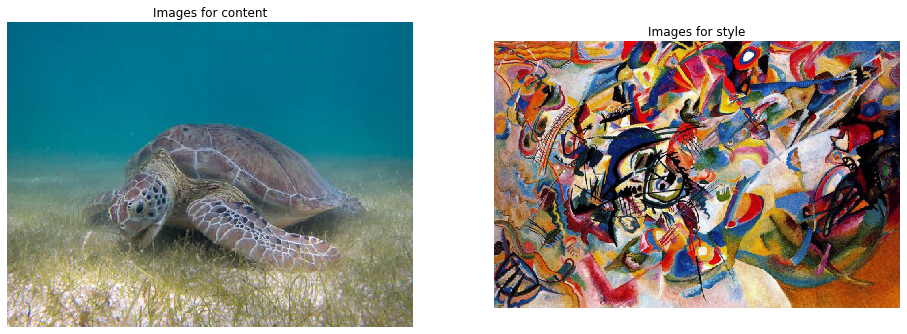

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for i, key in enumerate(d_path.keys()):
    img = plt.imread(d_path[key])    
    axes[i].imshow(img); 
    axes[i].axis('off');
    axes[i].set_title(f'Images for {key}')

# Create an image loader for PyTorch
To use PyTorch, images need to be loaded as tensor through the image loader.

In [43]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)

    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [41]:
style_img = image_loader(d_path['content'])
content_img = image_loader(d_path['style'])

## Plot tensor images as PIL image

In [80]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated




## Check `transform` process

Original image size: (1000, 657)


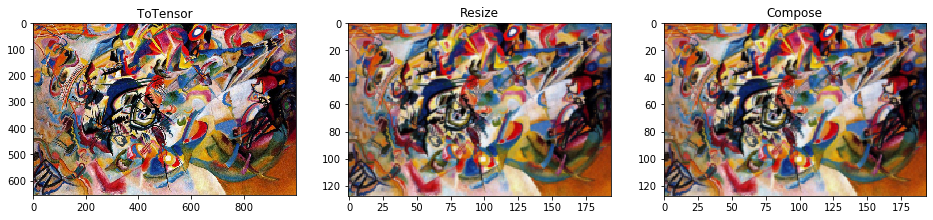

In [87]:
totensor = transforms.ToTensor()
scale = transforms.Resize(128)
composed = transforms.Compose([transforms.Resize(128),
                               transforms.ToTensor()])

# Apply each of the above transforms on sample.
fig = plt.figure(figsize=(16, 6))
img = Image.fromarray(plt.imread(d_path['style']))  
print(f'Original image size: {img.size}')
for i, tsfrm in enumerate([totensor, scale, composed]):
    transformed_sample = tsfrm(img)
    if i != 1:
        transformed_sample = transformed_sample.cpu().clone().squeeze(0)
        transformed_sample = unloader(transformed_sample)

    ax = plt.subplot(1, 3, i + 1)
    ax.set_title(type(tsfrm).__name__)
    ax.imshow(transformed_sample)
